In [1]:
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

C:\Users\User\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
#Getting stock price data
#SRCL
start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()
df = web.DataReader("SRCL", 'yahoo', start, end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

#prices in USD

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,64.709999,63.689999,64.040001,63.810001,528200,63.810001
2020-01-02,64.129997,61.790001,64.029999,62.660000,591800,62.660000
2020-01-03,62.639999,61.730000,62.230000,61.970001,679000,61.970001
2020-01-06,62.630001,61.320000,61.799999,62.509998,487100,62.509998
2020-01-07,62.849998,61.910000,62.480000,62.630001,350500,62.630001


Text(0,0.5,'Stock Value')

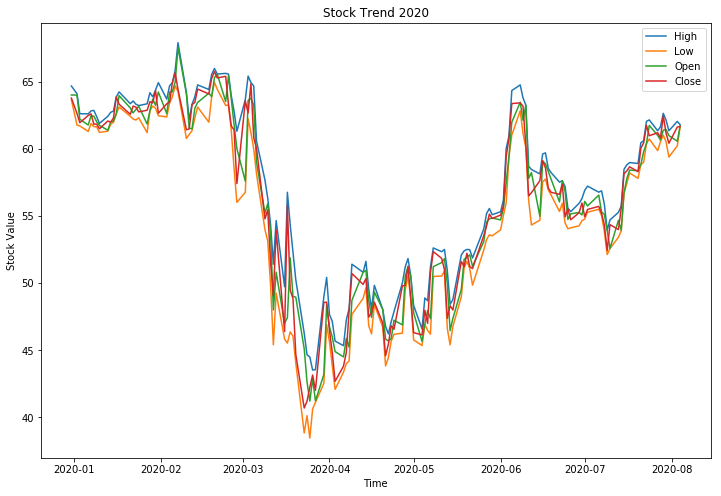

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(df[["High","Low","Open","Close"]])
plt.legend(labels=df[["High","Low","Open","Close"]])
plt.title('Stock Trend 2020', fontsize = 12)
plt.xlabel('Time')
plt.ylabel('Stock Value')

In [5]:

df_open_close= df.copy()
df_open_close['Close_10ma'] = df['Close'].rolling(window=10,min_periods=0).mean()
df_open_close['Open_10ma'] = df['Open'].rolling(window=10,min_periods=0).mean()

df_open_close.head()

,High,Low,Open,Close,Volume,Adj Close,Close_10ma,Open_10ma
Date,,,,,,,,
2019-12-31,64.709999,63.689999,64.040001,63.810001,528200,63.810001,63.810001,64.040001
2020-01-02,64.129997,61.790001,64.029999,62.660000,591800,62.660000,63.235001,64.035000
2020-01-03,62.639999,61.730000,62.230000,61.970001,679000,61.970001,62.813334,63.433333
2020-01-06,62.630001,61.320000,61.799999,62.509998,487100,62.509998,62.737500,63.025000
2020-01-07,62.849998,61.910000,62.480000,62.630001,350500,62.630001,62.716000,62.916000


Text(0,0.5,'Stock Value')

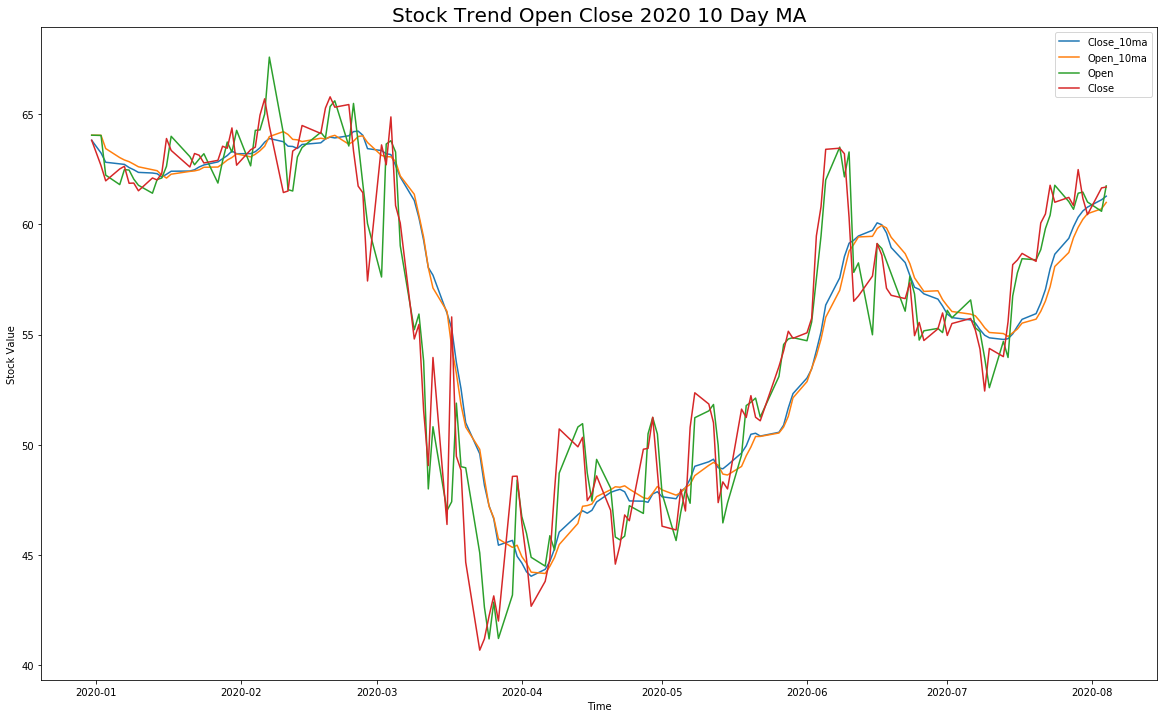

In [6]:
plt.figure(figsize=(20, 12))
plt.plot(df_open_close[["Close_10ma","Open_10ma","Open","Close"]])
plt.legend(labels=df_open_close[["Close_10ma","Open_10ma","Open","Close"]])
plt.title('Stock Trend Open Close 2020 10 Day MA', fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Stock Value')

In [7]:
#40days Moving Average

df_open_close['Close_40ma'] = df['Close'].rolling(window=40,min_periods=0).mean()
df_open_close['Open_40ma'] = df['Open'].rolling(window=40,min_periods=0).mean()

df_open_close.head()

,High,Low,Open,Close,Volume,Adj Close,Close_10ma,Open_10ma,Close_40ma,Open_40ma
Date,,,,,,,,,,
2019-12-31,64.709999,63.689999,64.040001,63.810001,528200,63.810001,63.810001,64.040001,63.810001,64.040001
2020-01-02,64.129997,61.790001,64.029999,62.660000,591800,62.660000,63.235001,64.035000,63.235001,64.035000
2020-01-03,62.639999,61.730000,62.230000,61.970001,679000,61.970001,62.813334,63.433333,62.813334,63.433333
2020-01-06,62.630001,61.320000,61.799999,62.509998,487100,62.509998,62.737500,63.025000,62.737500,63.025000
2020-01-07,62.849998,61.910000,62.480000,62.630001,350500,62.630001,62.716000,62.916000,62.716000,62.916000


Text(0,0.5,'Stock Value')

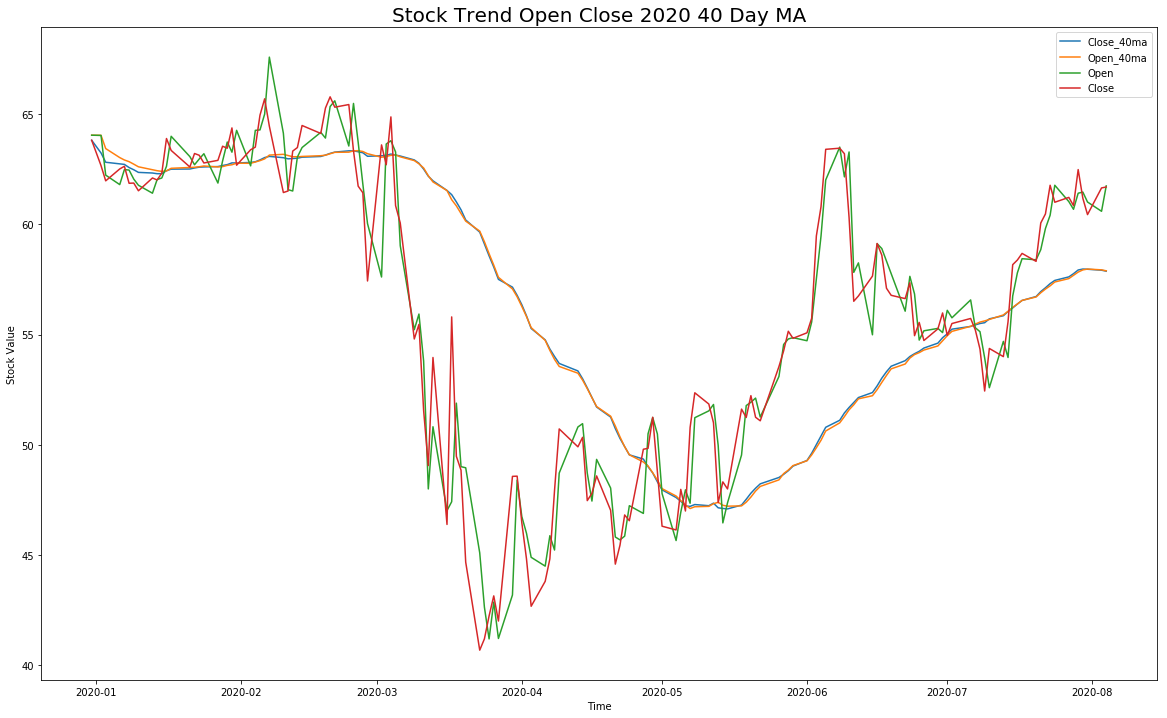

In [8]:
plt.figure(figsize=(20, 12))
plt.plot(df_open_close[["Close_40ma","Open_40ma","Open","Close"]])
plt.legend(labels=df_open_close[["Close_40ma","Open_40ma","Open","Close"]])
plt.title('Stock Trend Open Close 2020 40 Day MA', fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Stock Value')